In [1]:
import sys
sys.path.append("../src/")
from auv_gym_env import make_environment
import matplotlib.pyplot as plt
import numpy as np
%matplotlib

Using matplotlib backend: TkAgg


In [ ]:
world_size = 50
gravity = -1
xinit, yinit = 10, 10
targetx, targety = 0, 0
env = make_environment('manysmall', 50, -0.5, 5, 5)
env.render()
rewards = list()

In [ ]:
# control AUV with constant thrust angle and power
nframes = 10000
for frame in range(nframes):
    obs, reward, done, info = env.step((
        np.random.uniform(*env.auv._thruster_angle_limits), 
        np.random.uniform(0, 50)
    ))
    env.render()
    if done:
        break
    else:
        pass
    #print(reward)
    rewards.append(reward)

In [ ]:
# plot instantaneous reward sequence
plt.figure()
plt.plot(rewards, "kx")
plt.plot(np.cumsum(rewards), "k--")
plt.plot(np.divide(np.cumsum(rewards), np.linspace(1, len(rewards), len(rewards))), "k-")
plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Reward $r$')
plt.xlabel('Time Index')
plt.legend(['Instantaneous', 'Cummulative', "Running Average"])
plt.show()

In [121]:
# reward characterisation
r_inv = lambda x: 1 - x
r_obs = lambda x: x - 1
r_nsq = lambda x: -x

# normalised metrics
npts = 400
pts = np.linspace(0, 10, npts)
ppts = np.linspace(0, 1, npts)

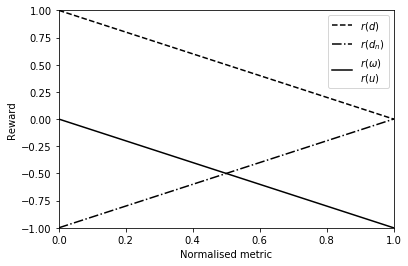

In [122]:
# plotting
plt.figure()

plt.plot(pts, r_inv(pts), "k--")
plt.plot(pts, r_obs(pts), "k-.")
plt.plot(pts, r_nsq(pts), "k-")

plt.legend(["$r(d)$", "$r(d_n)$", "$r(\omega)$ \n$r(u)$"])
plt.ylabel("Reward")
plt.xlabel("Normalised metric")
plt.ylim(-np.e, np.e)
plt.xlim(0, 1)
plt.ylim(-1, 1)


plt.savefig("rewards.pdf", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format="pdf",
        transparent=True, bbox_inches="tight")



plt.show()

In [ ]:
len([])

In [90]:
traj =np.load("../src/results1/data/manysmall_traj.npy")

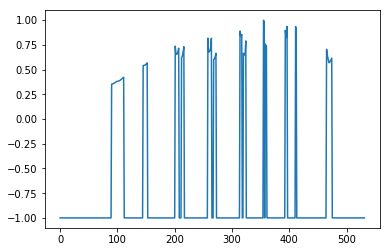

In [93]:
plt.plot(traj[0][:, 4])
plt.show()

In [94]:
1 / 0

ZeroDivisionError: division by zero